In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")


## Aux functions

In [2]:
# Get project root
PROJECT_ROOT = os.path.dirname(os.path.realpath('__file__'))

In [3]:
def get_df(df_name, num_buckets = 10, len_vector = 100000):
    df = pd.read_csv(join(PROJECT_ROOT, "data_miguel", df_name), header=None)
    df.columns = ["threads", "len_vector", "num_buckets", "execution_time"]
    original_shape = df.shape[0]
    
    # Drop rows with duplicates on threads, len_vector and num_buckets
    #df = df.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])
    after_shape = df.shape[0]

    #print("Dropped {} rows with from the original".format(original_shape - after_shape))

    df = df[df["num_buckets"] == num_buckets]
    df = df[df["len_vector"] == len_vector] 
    after_filtering_shape = df.shape[0]

    print("Dropped {} rows after filtering".format(after_shape - after_filtering_shape))

    return df

def plot_graphs(df_name, tempo_seq=None, savepath=join(PROJECT_ROOT, "graficos"), num_buckets = 10, len_vector = 100000):
    # Define stuff
    figsize=(6, 4)
    df = get_df(df_name, num_buckets=num_buckets, len_vector=len_vector)
    exec_time_savepath = join(savepath, "execution_time" + df_name.replace(".csv", ".png"))
    speed_up_savepath = join(savepath, "speed_up" + df_name.replace(".csv", ".png"))
    total_speed_up_savepath=join(savepath, "total_speed_up" + df_name.replace(".csv", ".png"))

    # Plot execution time vs threads
    plt.figure(figsize=figsize)
    plt.plot(df.threads,df.execution_time,'--o')
    if tempo_seq is not None:
        plt.hlines(tempo_seq, color='red', linestyle='--', label='Sequencial Time', xmin=df.threads.min(), xmax=df.threads.max())
        plt.legend()
    plt.xlabel('Number of threads')
    plt.ylabel('Excution time (s)')
    plt.show()
    plt.savefig(exec_time_savepath)

    # Plot speed up vs threads
    plt.figure(figsize=figsize)
    plt.plot(df.threads, tempo_seq/df.execution_time,'--o')
    plt.xlabel('Number of threads')
    plt.ylabel('Speed up')
    plt.show()
    plt.savefig(speed_up_savepath)


    # Plot total speed up  vs threads
    plt.figure(figsize=figsize)
    plt.plot(df.threads, 184/df.execution_time,'--o')
    plt.xlabel('Number of threads')
    plt.ylabel('Total speed up')
    plt.show()
    plt.savefig(total_speed_up_savepath)

## First run
- len(vector) = 1M
- buckets = 10

In [4]:
len_vector = 1000000
num_buckets = 10

Dropped 1 rows after filtering
Seq. Time: 5.04371

1º LOOP:
Dropped 9 rows after filtering


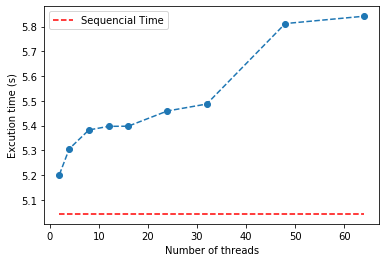

<Figure size 432x288 with 0 Axes>

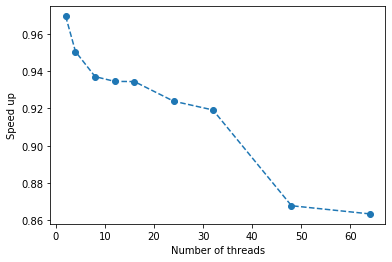

<Figure size 432x288 with 0 Axes>

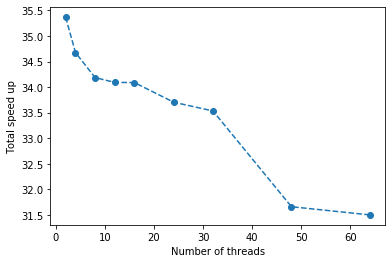


2º LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

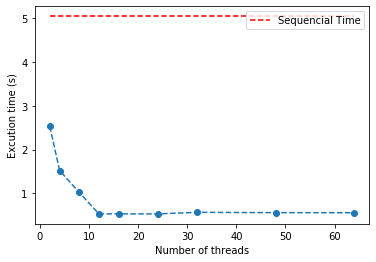

<Figure size 432x288 with 0 Axes>

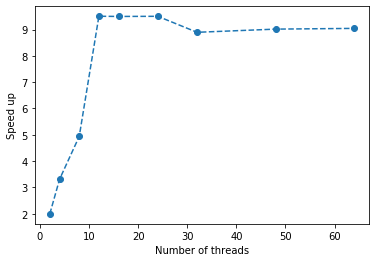

<Figure size 432x288 with 0 Axes>

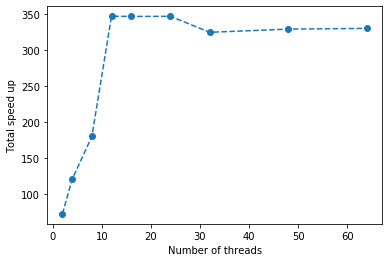


3º LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

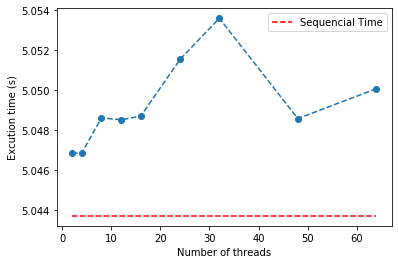

<Figure size 432x288 with 0 Axes>

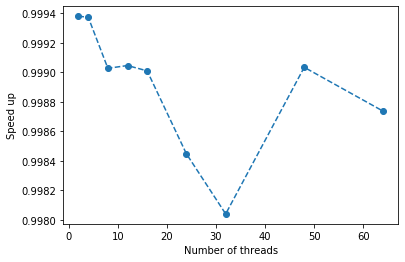

<Figure size 432x288 with 0 Axes>

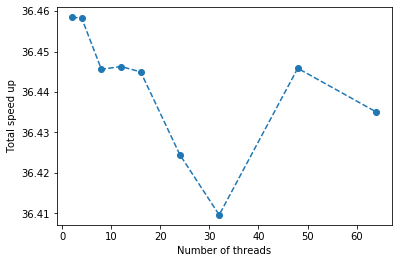


4º LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

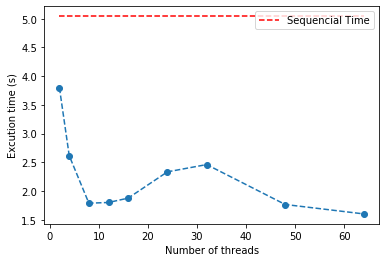

<Figure size 432x288 with 0 Axes>

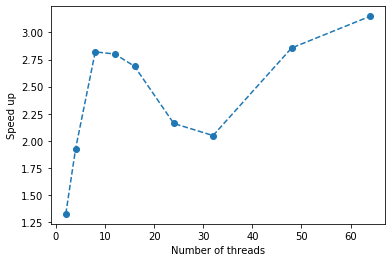

<Figure size 432x288 with 0 Axes>

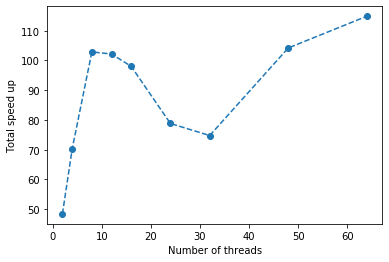


BEST LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

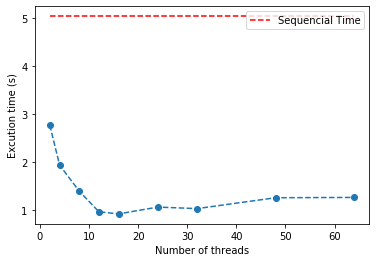

<Figure size 432x288 with 0 Axes>

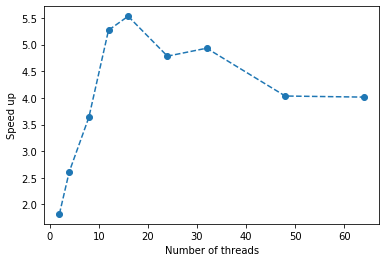

<Figure size 432x288 with 0 Axes>

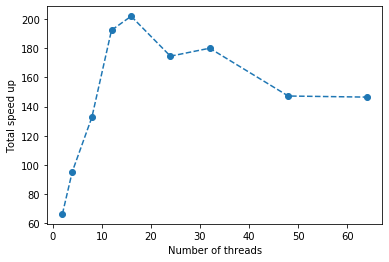


BEST LOOP Gabi:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

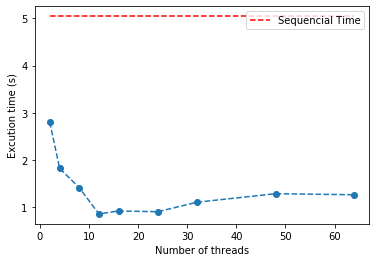

<Figure size 432x288 with 0 Axes>

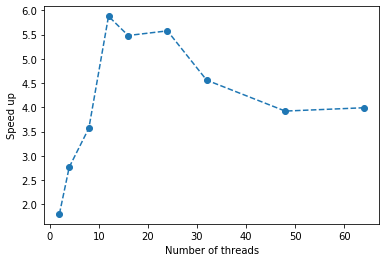

<Figure size 432x288 with 0 Axes>

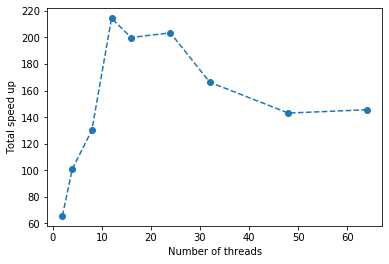


BEST LOOP Gabi 13:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

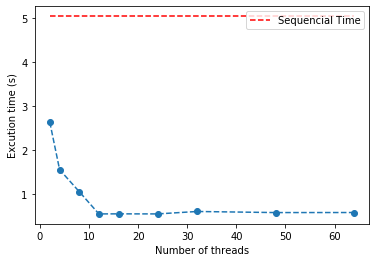

<Figure size 432x288 with 0 Axes>

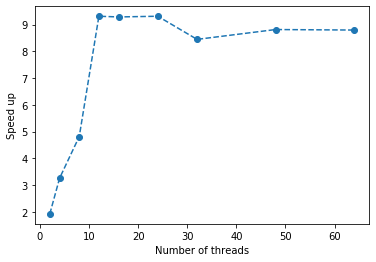

<Figure size 432x288 with 0 Axes>

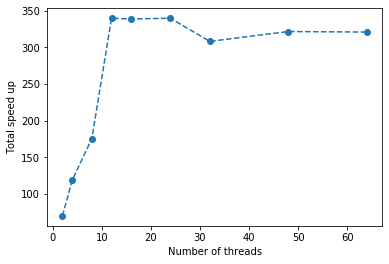


BEST LOOP Gabi 113:
Dropped 10 rows after filtering


<Figure size 432x288 with 0 Axes>

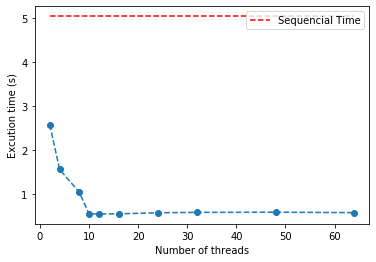

<Figure size 432x288 with 0 Axes>

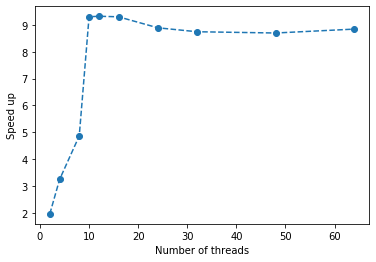

<Figure size 432x288 with 0 Axes>

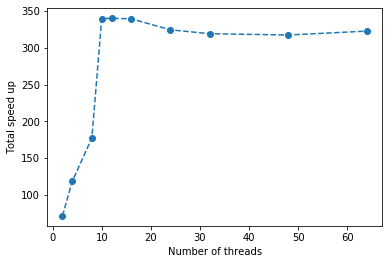

<Figure size 432x288 with 0 Axes>

In [5]:
seq_best_df = get_df("best_sequential.csv", num_buckets=num_buckets, len_vector=len_vector)
tempo_seq = float(seq_best_df.execution_time.astype(float))
print("Seq. Time:", tempo_seq)

print("\n1º LOOP:")
plot_graphs("1_first_loop.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\n2º LOOP:")
plot_graphs("2_second_loop.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\n3º LOOP:")
plot_graphs("3_third_loop.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\n4º LOOP:")
plot_graphs("4_quick_sort.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\nBEST LOOP:")
plot_graphs("Best.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\nBEST LOOP Gabi:")
plot_graphs("best_gabi.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\nBEST LOOP Gabi 13:")
plot_graphs("best_gabi_13.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\nBEST LOOP Gabi 113:")
plot_graphs("best_maisthreads.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

## Second run
- len(vector) = 1M
- buckets = 1000

In [6]:
len_vector = 1000000
num_buckets = 1000

Dropped 1 rows after filtering
Seq. Time: 0.097933

1º LOOP:
Dropped 9 rows after filtering


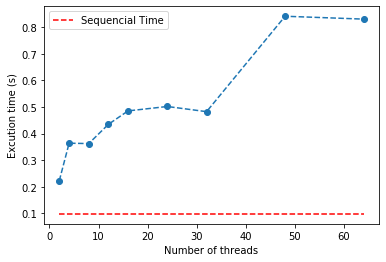

<Figure size 432x288 with 0 Axes>

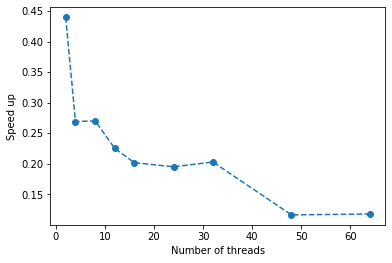

<Figure size 432x288 with 0 Axes>

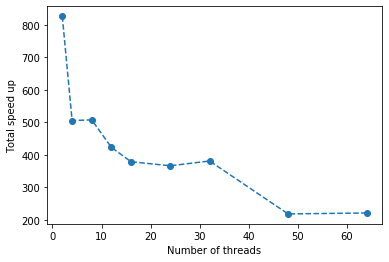


2º LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

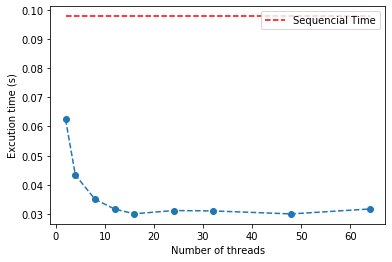

<Figure size 432x288 with 0 Axes>

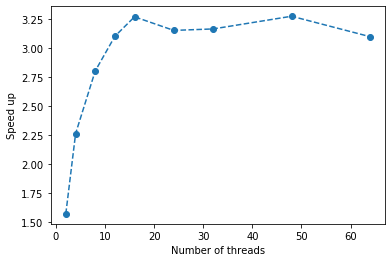

<Figure size 432x288 with 0 Axes>

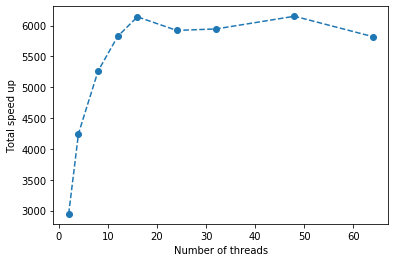


3º LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

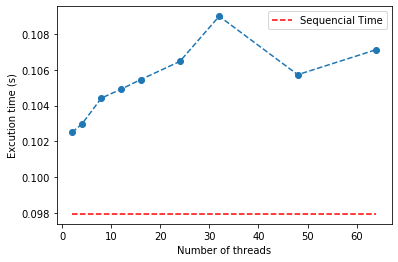

<Figure size 432x288 with 0 Axes>

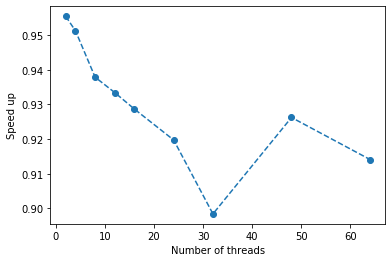

<Figure size 432x288 with 0 Axes>

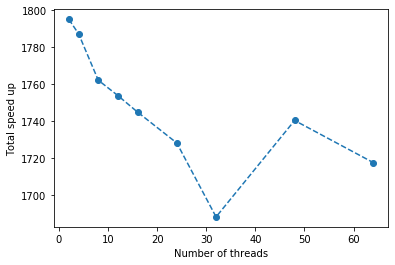


4º LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

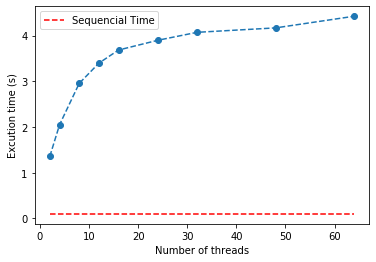

<Figure size 432x288 with 0 Axes>

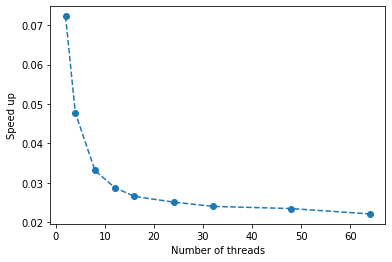

<Figure size 432x288 with 0 Axes>

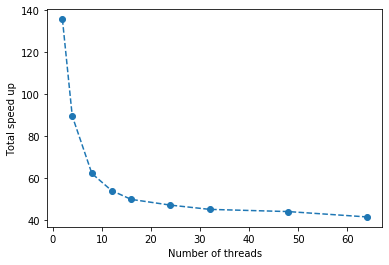


BEST LOOP:
Dropped 9 rows after filtering


<Figure size 432x288 with 0 Axes>

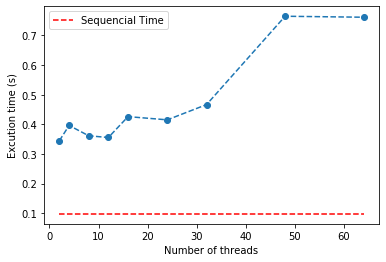

<Figure size 432x288 with 0 Axes>

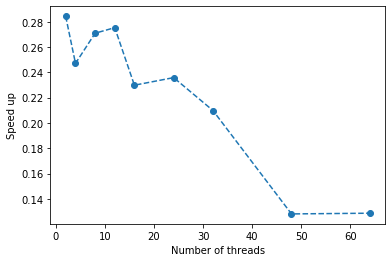

<Figure size 432x288 with 0 Axes>

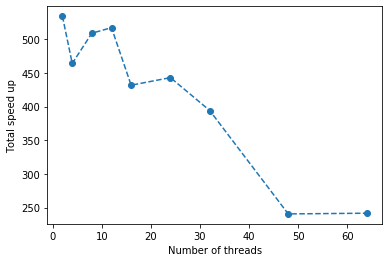

<Figure size 432x288 with 0 Axes>

In [7]:
seq_best_df = get_df("best_sequential.csv", num_buckets=num_buckets, len_vector=len_vector)
tempo_seq = float(seq_best_df.execution_time.astype(float))
print("Seq. Time:", tempo_seq)

print("\n1º LOOP:")
plot_graphs("1_first_loop.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\n2º LOOP:")
plot_graphs("2_second_loop.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\n3º LOOP:")
plot_graphs("3_third_loop.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\n4º LOOP:")
plot_graphs("4_quick_sort.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)

print("\nBEST LOOP:")
plot_graphs("Best.csv", tempo_seq=tempo_seq, num_buckets=num_buckets, len_vector=len_vector)